<a href="https://colab.research.google.com/github/akankshajaiswal8111/Alternus-Vera/blob/main/Alternus_Vera_Bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Factor: Biases

Approach:

I did some research and found that there are many types of bias in news. I've decided to work with Spin bias, Subjective bias and emotionalism bias: https://www.allsides.com/media-bias/how-to-spot-types-of-media-bias#OpinionAsFact . There are certain words/phrases and frequency of them that can create these bias. So my strategy at high level is:

Detect such words/phrases in the text.

Add a feature with these types of bias.

Remove them from headlines/articles.

Classify text/article and get score using mullers loop.

Process Steps Completed So Far:

Load the Liar-Liar Data

Distillation Process

Data Cleaning and Text Preprocessing

WordCloud Visualization

#Load Liar-Liar dataset

In [124]:
!pip install gensim

In [125]:
import pandas as pd
import numpy as np
import csv
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from string import punctuation
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import re
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')
import matplotlib.pyplot as plt
from scipy import sparse

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Reading the data

In [180]:
#train_filename="https://raw.githubusercontent.com/mal258/machinelearning258/master/datasets/liar_dataset/train.tsv"
train_filename="https://raw.githubusercontent.com/akankshajaiswal8111/Alternus-Vera/main/input/train.tsv"
test_filename="https://raw.githubusercontent.com/akankshajaiswal8111/Alternus-Vera/main/input/test.tsv"
valid_filename="https://raw.githubusercontent.com/akankshajaiswal8111/Alternus-Vera/main/input/valid.tsv"
cols = ['jsonid', 'label', 'headline_text', 'subject', 'speaker', 'speakerjobtitle', 'stateinfo','partyaffiliation', 'barelytruecounts', 'falsecounts','halftruecounts','mostlytrueocunts','pantsonfirecounts','context']

In [181]:
train_news = pd.read_csv(train_filename, sep='\t', names = cols, error_bad_lines=False)
test_news = pd.read_csv(test_filename, sep='\t', names = cols, error_bad_lines=False)
valid_news = pd.read_csv(valid_filename, sep='\t', names = cols, error_bad_lines=False)

In [182]:
# Display check the dimensions and the first 2 rows of the file.
print('train dim:',train_news.shape, 'test dim:', test_news.shape)
train_news.iloc[0:5]

train dim: (10240, 14) test dim: (1267, 14)


,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


#Distillation

Step 1: Data Cleaning and Text Preprocessing

Step 2: Sentiment analysis using Vader Sentiment Analyser

Step 3: POS(parts of speech) using nltk tokenisation and postag



## Data cleaning and preprocessing

Remove Special Characters and Punctuations

Lower case the news

Tokenization

Remove Stop Words

Lemmatization

Stemming

Spell Check



In [183]:
import re

def cleaning(raw_news):
    import nltk
    
    # 1. Remove non-letters/Special Characters and Punctuations
    news = re.sub("[^a-zA-Z]", " ", raw_news)
    
    # 2. Convert to lower case.
    news =  news.lower()
    
    # 3. Tokenize.
    news_words = nltk.word_tokenize(news)
    
    # 4. Convert the stopwords list to "set" data type.
    stops = set(nltk.corpus.stopwords.words("english"))
    
    # 5. Remove stop words. 
    words = [w for w in  news_words  if not w in stops]
    
    # 6. Lemmentize 
    wordnet_lem = [ WordNetLemmatizer().lemmatize(w) for w in words ]
    
    # 7. Stemming
    #stems = [nltk.stem.SnowballStemmer('english').stem(w) for w in wordnet_lem ]
    
    # 8. Join the stemmed words back into one string separated by space, and return the result.
    return " ".join(wordnet_lem)

In [184]:
import time
# clean training and test data 
# create new column "tokenized"
t1 = time.time()

# Add the processed data to the original data. 
# Perhaps using apply function would be more elegant and concise than using for loop
train_news['clean'] = train_news["headline_text"].apply(cleaning) 

t2 = time.time()
print("\nTime to clean, tokenize and stem train data: \n", len(train_news), "news:", (t2-t1)/60, "min")

t1 = time.time()
test_news['clean'] = test_news["headline_text"].apply(cleaning)

t2 = time.time()
print("\n\nTime to clean, tokenize and stem test data: \n", len(test_news), "news:", (t2-t1)/60, "min")

t1 = time.time()
valid_news['clean'] = valid_news["headline_text"].apply(cleaning)

t2 = time.time()
print("\n\nTime to clean, tokenize and stem valid data: \n", len(valid_news), "news:", (t2-t1)/60, "min")


Time to clean, tokenize and stem train data: 
 10240 news: 0.06543637116750081 min


Time to clean, tokenize and stem test data: 
 1267 news: 0.008177848656972249 min


Time to clean, tokenize and stem valid data: 
 1284 news: 0.008429419994354249 min


**Google News corpus word2vec



In [185]:
!wget -P /root/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

from gensim import models
model = gensim.models.KeyedVectors.load_word2vec_format('/root/input/GoogleNews-vectors-negative300.bin.gz', binary=True)
words = model.index2word

w_rank = {}
for i,word in enumerate(words):
    w_rank[word] = i

WORDS = w_rank

--2020-11-10 22:41:39--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.41.174
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.41.174|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [186]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return - WORDS.get(word, 0)

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

def spell_checker(text):
    all_words = re.findall(r'\w+', text.lower()) # split sentence to words
    spell_checked_text  = []
    for i in range(len(all_words)):
        spell_checked_text.append(correction(all_words[i]))
    return ' '.join(spell_checked_text)

In [187]:
print("Before: \n", train_news['clean'][0] )
t1 = time.time()
train_news['clean'] = train_news['clean'].apply(spell_checker)
t2 = time.time()
print("\nTime to spell check the train data: \n", len(train_news), "news:", (t2-t1)/60, "min")

print("\nAfter: \n",train_news['clean'][0] )
train_news.head(5)

Before: 
 say annies list political group support third trimester abortion demand

Time to spell check the train data: 
 10240 news: 2.940803575515747 min

After: 
 say nannies list political group support third trimester abortion demand


,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say nannies list political group support third...
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,decline coal start started natural gas took st...
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillary clinton agrees john mccain voting give...
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legislation likely mandate ...
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,economic turnaround started end term


In [134]:
t1 = time.time()
test_news['clean'] = test_news['clean'].apply(spell_checker)
test_news.head(5)
t2 = time.time()
print("\nTime to spell check the test data: \n", len(test_news), "news:", (t2-t1)/60, "min")


Time to spell check the test data: 
 1267 news: 0.3215408484141032 min


In [135]:
t1 = time.time()
valid_news['clean'] = valid_news['clean'].apply(spell_checker)
valid_news.head(5)
t2 = time.time()
print("\nTime to spell check the valid data: \n", len(valid_news), "news:", (t2-t1)/60, "min")


Time to spell check the valid data: 
 1284 news: 0.36309429407119753 min


##Visualisation

WordCloud

As a tool for visualization by using the frequency of words appeared in text, we use WordCloud. Note that it can give more information and insight of texts by analyzing correlations and similarities between words rather than analyzing texts only by the frequency of words appeared; however, it can give you some general shape of what this text is about quickly and intuitively.

In [136]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

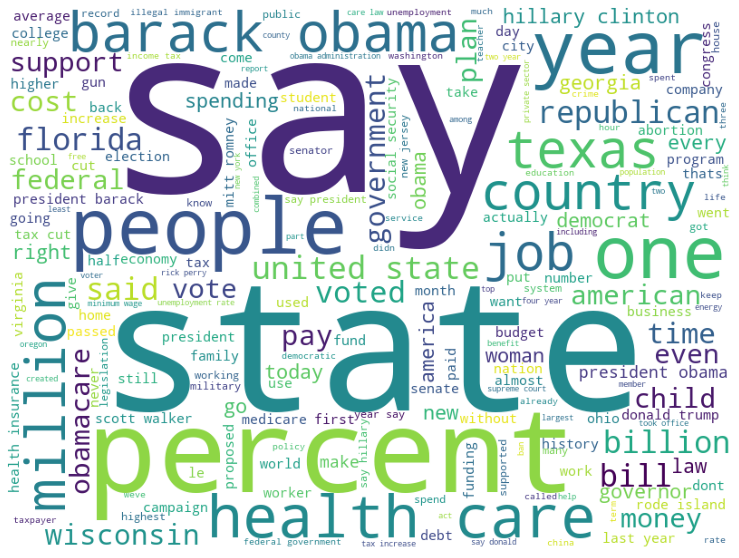

In [137]:
def cloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
cloud(' '.join(train_news['clean']))

In [138]:
!mkdir input_data

mkdir: cannot create directory ‘input_data’: File exists


In [139]:
train_news.to_csv("input_data/train_processed.csv", sep=',')
test_news.to_csv("input_data/test_processed.csv", sep=',')
valid_news.to_csv("input_data/valid_processed.csv", sep=',')

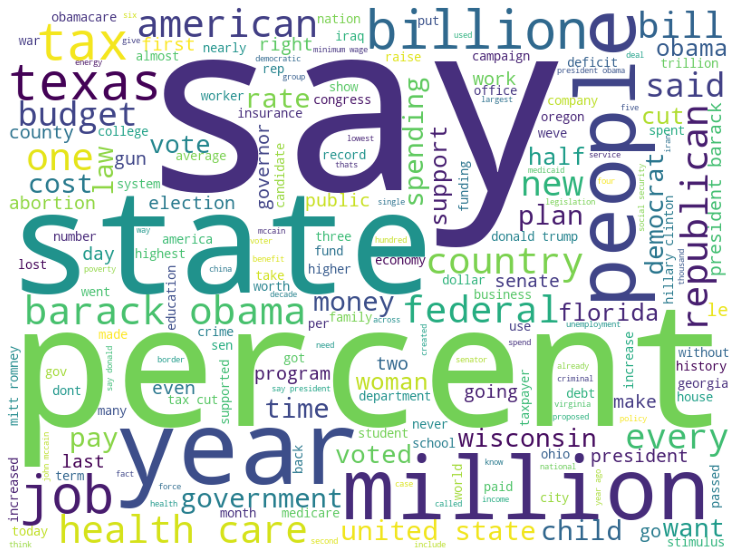

In [140]:
cloud(' '.join(test_news['clean']))

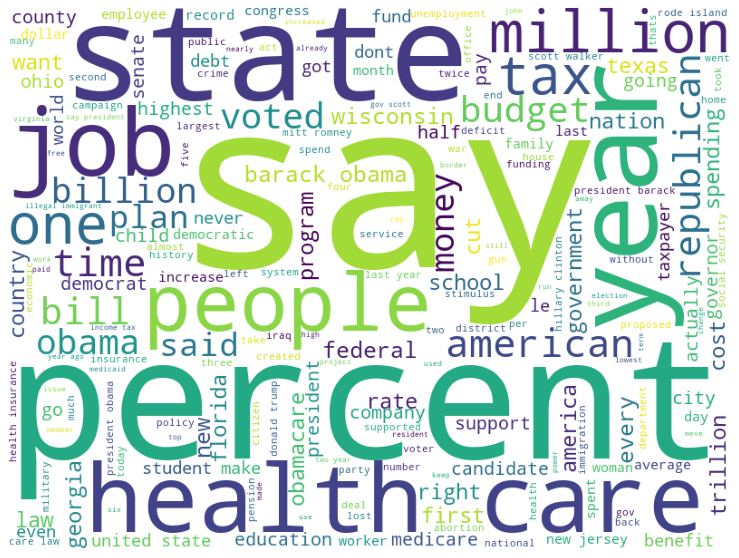

In [141]:
cloud(' '.join(valid_news['clean']))

##Sentiment Analysis

Using Vader sentiment analyser

In [142]:
!pip install vaderSentiment

In [143]:
import nltk.sentiment
nltk.download('vader_lexicon')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
senti = nltk.sentiment.vader.SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [144]:
import warnings
import nltk.sentiment
warnings.filterwarnings('ignore')

senti = nltk.sentiment.vader.SentimentIntensityAnalyzer()

def print_sentiment_scores(sentence):
    snt = senti.polarity_scores(sentence)
    print("{:-<40} \n{}".format(sentence, str(snt)))
    
print_sentiment_scores(train_news['clean'][0])

say nannies list political group support third trimester abortion demand 
{'neg': 0.123, 'neu': 0.656, 'pos': 0.221, 'compound': 0.296}


In [145]:
def get_vader_polarity(snt):
    if not snt:
        return None
    elif snt['neg'] > snt['pos'] and snt['neg'] > snt['neu']:
        return -1
    elif snt['pos'] > snt['neg'] and snt['pos'] > snt['neu']:
        return 1
    else:
        return 0

In [146]:
#Function to determine if a text is negative(-1) or postive (1) or neutral (0)
def get_polarity_type(sentence):
    sentimentVector = []
    snt = senti.polarity_scores(sentence)
    sentimentVector.append(get_vader_polarity(snt))
    sentimentVector.append(snt['neg'])
    sentimentVector.append(snt['neu'])
    sentimentVector.append(snt['pos'])
    sentimentVector.append(snt['compound'])
    
    print(sentimentVector)
    return sentimentVector

In [147]:
sentiment = []
vader_pol = []
cmp_score = []
for row in train_news['clean']:
    get_pols = get_polarity_type(row)
    sentiment.append(get_pols[1:])
    vader_pol.append(get_pols[0])
    cmp_score.append(get_pols[1:][-1]) #last element 
    
train_news['sentiment_vector'] = sentiment
train_news['vader_polarity'] = vader_pol
train_news['sentiment_score'] = cmp_score

Streaming output truncated to the last 5000 lines.
[0, 0.176, 0.538, 0.287, 0.3045]
[-1, 0.524, 0.34, 0.136, -0.8402]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.104, 0.896, 0.0, -0.2732]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.556, 0.444, 0.4939]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.452, 0.548, 0.0, -0.5106]
[0, 0.204, 0.796, 0.0, -0.3182]
[0, 0.0, 0.64, 0.36, 0.7351]
[0, 0.065, 0.761, 0.174, 0.4588]
[0, 0.161, 0.839, 0.0, -0.3182]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.333, 0.667, 0.0, -0.6705]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.813, 0.187, 0.3182]
[0, 0.0, 0.746, 0.254, 0.7579]
[0, 0.161, 0.677, 0.161, 0.0]
[0, 0.269, 0.373, 0.358, 0.0516]
[0, 0.0, 0.851, 0.149, 0.2732]
[0, 0.138, 0.638, 0.223, 0.1531]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.303, 0.378, 0.319, 0.0772]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.294, 0.706, 0.0, -0.3612]
[0, 0.0, 1.0, 0.0, 0.0]
[0, 0.0, 0.659, 0.341, 0.4767]
[0, 0.216, 0.784, 0.0, -0.296]
[0, 0.153, 0.847, 0.0, -0.5574]
[0, 0.092, 0.814,

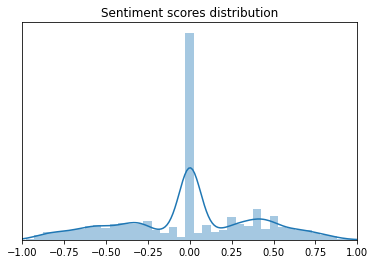

In [148]:
sns.distplot(train_news.sentiment_score, axlabel=False, ax=plt.gca())
plt.title('Sentiment scores distribution')
plt.gca().get_yaxis().set_visible(False)
plt.xlim(-1,1)
plt.show()

##Part of Speech

In [149]:
import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet

from IPython.display import display
lemmatizer = nltk.WordNetLemmatizer()

#word tokenizeing and part-of-speech tagger
pos_list = []

for sentence in train_news['headline_text']:
  pos_dict = {}
  pos_dict.setdefault('Noun', [])
  pos_dict.setdefault('Adjective', [])
  pos_dict.setdefault('Verb', [])
  pos_dict['headline_text'] = sentence
  
  tokens = [nltk.word_tokenize(sent) for sent in [sentence]]
  postag = [nltk.pos_tag(sent) for sent in tokens][0]
  pos_dict['postag'] = postag
  for tag in postag:
    if (tag[1].startswith('NN')):
      pos_dict['Noun'].append(tag[0])
    if (tag[1].startswith('JJ')):
      pos_dict['Adjective'].append(tag[0])
    if (tag[1].startswith('VB')):
      pos_dict['Verb'].append(tag[0])

  # pos_dict['Noun'] = [item for sublist in pos_dict['Noun'] for item in sublist]
  # pos_dict['Adjective'] = [item for sublist in pos_dict['Adjective'] for item in sublist]
  # pos_dict['Verb'] = [item for sublist in pos_dict['Verb'] for item in sublist]


  pos_list.append(pos_dict)

pos_df = pd.DataFrame(pos_list)
# pos_df

In [150]:
pos_df

,Noun,Adjective,Verb,headline_text,postag
0,"[Annies, List, group, third-trimester, abortio...",[political],"[Says, supports]",Says the Annies List political group supports ...,"[(Says, VBZ), (the, DT), (Annies, NNPS), (List..."
1,"[decline, coal, start, gas, President, George,...",[natural],"[did, started, took, started, begin]",When did the decline of coal start? It started...,"[(When, WRB), (did, VBD), (the, DT), (decline,..."
2,"[Hillary, Clinton, John, McCain, George, Bush,...",[],"[agrees, voting, give]","Hillary Clinton agrees with John McCain ""by vo...","[(Hillary, NNP), (Clinton, NNP), (agrees, VBZ)..."
3,"[Health, care, reform, legislation, sex, chang...","[likely, free]","[is, mandate]",Health care reform legislation is likely to ma...,"[(Health, NNP), (care, NN), (reform, NN), (leg..."
4,"[turnaround, end, term]",[economic],[started],The economic turnaround started at the end of ...,"[(The, DT), (economic, JJ), (turnaround, NN), ..."
...,...,...,...,...,...
10235,"[number, shark, attacks, Florida, cases, voter...",[larger],"[are, are]",There are a larger number of shark attacks in ...,"[(There, EX), (are, VBP), (a, DT), (larger, JJ..."
10236,"[Democrats, party, [, Atlanta, ], metro, area,...",[],"[have, become]",Democrats have now become the party of the [At...,"[(Democrats, NNPS), (have, VBP), (now, RB), (b..."
10237,"[alternative, Social, Security, Galveston, Cou...","[whole, more]","[Says, operates, has, meant, retire]",Says an alternative to Social Security that op...,"[(Says, VBZ), (an, DT), (alternative, NN), (to..."
10238,"[U.S., Cuban, embargo, travel, Cuba]",[],"[lifting, allowing]",On lifting the U.S. Cuban embargo and allowing...,"[(On, IN), (lifting, VBG), (the, DT), (U.S., N..."


In [151]:

# from google.colab import drive
# drive.mount('/content/drive')

In [152]:
# import pandas as pd
# path = "/content/drive/My Drive/ML_AV/spin_dict.csv"
# spin_dict = pd.read_csv(path, sep=',')

#Bias calculation:

I have selected Spin bias, Subjective Bias and Sensationalism bias from https://www.allsides.com/media-bias/how-to-spot-types-of-media-bias

There ia vocabulary of words which indicate presence of bias in the sentence.

Below is the dictionary:


In [153]:
#Types of bias
subjective_words = ['good','better', 'best', 'bad', 'worse', 'worst', 'considered', 'dangerous', 'seemingly', 'suggests', 'decrying', 'apparently', 'possibly', 'could', 'would']
sensationalism_words = ['shocking', 'remarkable', 'rips', 'chaotic', 'lashed', 'onslaught', 'scathing', 'showdown', 'explosive','slams', 'forcing','warning','embroiled','torrent', 'desperate']
spin_words = ['emerge','serious','refuse','crucial','high-stakes','tirade','landmark','major','critical','decrying','offend','stern','offensive','meaningful','significant','monumental','finally','concede','dodge','latest','admission','acknowledge','mock','rage','brag','lashed','scoff','frustrate','incense','erupt','rant','boast','gloat','fume',]


Finding intersection of these vocabulary of bias words with the POS distillation on actual article. Getting the total number of nouns, adjectives and verbs from this intersection.

In [154]:
results = []
for index, row in pos_df.iterrows(): 
  #print(row['Noun'])
  adj_common_set = set(row['Adjective'])
  noun_common_set = set(row['Noun'])
  verb_common_set = set(row['Verb'])

  set_subjective_words = set(subjective_words)
  set_sens_words = set(sensationalism_words)
  set_spin_words = set(spin_words)

  subj_intersect_adj = list(adj_common_set & set_subjective_words)
  subj_intersect_noun = list(noun_common_set & set_subjective_words)
  subj_intersect_verb = list(verb_common_set & set_subjective_words)

  sens_intersect_adj = list(adj_common_set & set_sens_words)
  sens_intersect_noun = list(noun_common_set & set_sens_words)
  sens_intersect_verb = list(verb_common_set & set_sens_words)

  spin_intersect_adj = list(adj_common_set & set_spin_words)
  spin_intersect_noun = list(noun_common_set & set_spin_words)
  spin_intersect_verb = list(verb_common_set & set_spin_words)
#Calculating subjective words count
  c=0
  for i in range(len(subj_intersect_adj)):
    temp = row['headline_text'].split()
    for j in range(len(temp)):
      if subj_intersect_adj[i]==temp[j]:
        c = c+1
  #row['Adjective_count'] = c
  pos_df.at[index, 'subj_Adj_count'] = c
  c=0
  for i in range(len(subj_intersect_noun)):
    temp = row['headline_text'].split()
    for j in range(len(temp)):
      if subj_intersect_noun[i]==temp[j]:
        c = c+1
  #row['Adjective_count'] = c
  pos_df.at[index, 'subj_Noun_count'] = c

  c=0
  for i in range(len(subj_intersect_verb)):
    temp = row['headline_text'].split()
    for j in range(len(temp)):
      if subj_intersect_verb[i]==temp[j]:
        c = c+1
  #row['Adjective_count'] = c
  pos_df.at[index, 'subj_Verb_count'] = c
  
#Calculating sensationalism words count
  c=0
  for i in range(len(sens_intersect_adj)):
    temp = row['headline_text'].split()
    for j in range(len(temp)):
      if sens_intersect_adj[i]==temp[j]:
        c = c+1
  pos_df.at[index, 'sens_Adj_count'] = c
  c=0
  for i in range(len(sens_intersect_noun)):
    temp = row['headline_text'].split()
    for j in range(len(temp)):
      if sens_intersect_noun[i]==temp[j]:
        c = c+1
  #row['Adjective_count'] = c
  pos_df.at[index, 'sens_Noun_count'] = c

  c=0
  for i in range(len(sens_intersect_verb)):
    temp = row['headline_text'].split()
    for j in range(len(temp)):
      if sens_intersect_verb[i]==temp[j]:
        c = c+1
  #row['Adjective_count'] = c
  pos_df.at[index, 'sens_Verb_count'] = c

#Calculating spin words count
  c=0
  for i in range(len(spin_intersect_adj)):
    temp = row['headline_text'].split()
    for j in range(len(temp)):
      if spin_intersect_adj[i]==temp[j]:
        c = c+1
  #row['Adjective_count'] = c
  pos_df.at[index, 'spin_Adj_count'] = c
  c=0
  for i in range(len(spin_intersect_noun)):
    temp = row['headline_text'].split()
    for j in range(len(temp)):
      if spin_intersect_noun[i]==temp[j]:
        c = c+1
  #row['Adjective_count'] = c
  pos_df.at[index, 'spin_Noun_count'] = c

  c=0
  for i in range(len(spin_intersect_verb)):
    temp = row['headline_text'].split()
    for j in range(len(temp)):
      if spin_intersect_verb[i]==temp[j]:
        c = c+1
  #row['Adjective_count'] = c
  pos_df.at[index, 'spin_Verb_count'] = c


In [155]:
pos_df[pos_df['sens_Verb_count'] > 1]

,Noun,Adjective,Verb,headline_text,postag,subj_Adj_count,subj_Noun_count,subj_Verb_count,sens_Adj_count,sens_Noun_count,sens_Verb_count,spin_Adj_count,spin_Noun_count,spin_Verb_count
2688,"[Social, Security, Rep., Jim, Renacci, agency,...","[entire, new, disabled]","[slashing, end, forcing, shut, causing, get, h...","In slashing $1.7 billion from Social Security,...","[(In, IN), (slashing, VBG), ($, $), (1.7, CD),...",0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


##Polynomial Equation per artcile

((num_nouns + num_adj +num_verb) * spin_bias + (num_nouns + num_adj +num_verb) * subjective_bias + (num_nouns + num_adj +num_verb) * sensationalism_bias)/ total word_count + sentiment_score



In [156]:
pos_df['total_Noun'] = pos_df['spin_Noun_count'] + pos_df['subj_Noun_count'] + pos_df['sens_Noun_count']
pos_df['total_Verb'] = pos_df['spin_Verb_count'] + pos_df['subj_Verb_count'] + pos_df['sens_Verb_count']
pos_df['total_Adj'] = pos_df['spin_Adj_count'] + pos_df['subj_Adj_count'] + pos_df['sens_Adj_count']

In [157]:
pos_df_1=pos_df.drop(pos_df.columns[[0, 1, 2, 4, 5, 6, 7, 8 , 9, 10, 11, 12, 13]], axis=1) 
pos_df_1

,headline_text,total_Noun,total_Verb,total_Adj
0,Says the Annies List political group supports ...,0.0,0.0,0.0
1,When did the decline of coal start? It started...,0.0,0.0,0.0
2,"Hillary Clinton agrees with John McCain ""by vo...",0.0,0.0,0.0
3,Health care reform legislation is likely to ma...,0.0,0.0,0.0
4,The economic turnaround started at the end of ...,0.0,0.0,0.0
...,...,...,...,...
10235,There are a larger number of shark attacks in ...,0.0,0.0,0.0
10236,Democrats have now become the party of the [At...,0.0,0.0,0.0
10237,Says an alternative to Social Security that op...,0.0,0.0,0.0
10238,On lifting the U.S. Cuban embargo and allowing...,0.0,0.0,0.0


In [158]:
maxValues = pos_df_1[['total_Noun', 'total_Verb', 'total_Adj']].max() 
  
print("Maximum value in column : ") 
print(maxValues)

Maximum value in column : 
total_Noun    2.0
total_Verb    2.0
total_Adj     3.0
dtype: float64


Getting highly biased article based on maximum total count of bias words found in an sentence/article.

In [159]:
pos_df_1['total'] =  pos_df_1['total_Noun']+ pos_df['total_Verb']+pos_df['total_Adj']
pos_df_1.sort_values(by=['total'], ascending=False)

,headline_text,total_Noun,total_Verb,total_Adj,total
5426,Rhode Island has the worst maintained bridges ...,2.0,0.0,2.0,4.0
1120,"Virginia was named best managed state, best st...",0.0,0.0,3.0,3.0
8476,"A national study of 2,500 charter schools show...",0.0,0.0,3.0,3.0
895,Bill Richardson is the only major Democratic c...,0.0,0.0,2.0,2.0
5627,Responding to a major snow event in Atlanta wo...,0.0,0.0,2.0,2.0
...,...,...,...,...,...
3468,"Right now, we have the lowest gas tax of anywh...",0.0,0.0,0.0,0.0
3469,Says Hillary Clinton and Tim Kaine want to shu...,0.0,0.0,0.0,0.0
3470,When President Obama was running for re-electi...,0.0,0.0,0.0,0.0
3471,Providence has amongst the highest tax rate(s)...,0.0,0.0,0.0,0.0


In [160]:
pos_df_1[pos_df_1['total_Verb'] > 0].shape

(33, 5)

In [161]:
train_news_merge = pd.merge(train_news, pos_df_1, on='headline_text')
train_news_merge.sort_values(by=['total'], ascending=False)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score,total_Noun,total_Verb,total_Adj,total
5458,6137.json,true,Rhode Island has the worst maintained bridges ...,"state-budget,state-finances,transportation",michael-chippendale,State Representative,Rhode Island,republican,1.0,1.0,0.0,1.0,0.0,speech on the RI House floor,rode island worst maintained bridge united sta...,"[0.373, 0.5, 0.127, -0.7506]",0,-0.7506,2.0,0.0,2.0,4.0
8513,4369.json,true,"A national study of 2,500 charter schools show...",education,james-parisi,Lobbyst for the Rhode Island Federation of Tea...,Rhode Island,labor-leader,0.0,0.0,0.0,0.0,0.0,a TV news show,national study charter school show maybe perce...,"[0.149, 0.625, 0.226, 0.1531]",0,0.1531,0.0,0.0,3.0,3.0
1131,3540.json,true,"Virginia was named best managed state, best st...","children,economy,education,elections,small-bus...",tim-kaine,U.S. Senator,Virginia,democrat,8.0,3.0,15.0,15.0,0.0,a YouTube video,virginia named best managed state best state b...,"[0.0, 0.442, 0.558, 0.9274]",1,0.9274,0.0,0.0,3.0,3.0
8118,7870.json,half-true,Our ranking in terms of the best and worst sta...,"job-accomplishments,jobs,small-business",scott-walker,Milwaukee County Executive,Wisconsin,republican,26.0,41.0,32.0,40.0,11.0,a television interview,ranking term best worst state business four ye...,"[0.212, 0.57, 0.218, 0.0258]",0,0.0258,0.0,1.0,1.0,2.0
1539,7756.json,mostly-true,"Four balanced budgets in a row, with no new ta...","job-accomplishments,jobs,state-budget,state-fi...",chris-christie,Governor of New Jersey,New Jersey,republican,10.0,17.0,27.0,19.0,8.0,a television ad,four balanced budget row new tax anyone best j...,"[0.036, 0.514, 0.45, 0.9524]",0,0.9524,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3483,3492.json,pants-fire,One. Thats the number of new drilling permits ...,"energy,oil-spill",michele-bachmann,Congresswoman,Minnesota,republican,8.0,22.0,6.0,4.0,16.0,a speech at the Conservative Principles PAC Co...,one thats number new drilling permit obama adm...,"[0.0, 0.885, 0.115, 0.0772]",0,0.0772,0.0,0.0,0.0,0.0
3484,7294.json,pants-fire,We just had someone last week in Neenah near a...,guns,scott-walker,Milwaukee County Executive,Wisconsin,republican,26.0,41.0,32.0,40.0,11.0,a news conference,someone last week veena near school kill someo...,"[0.343, 0.657, 0.0, -0.6908]",0,-0.6908,0.0,0.0,0.0,0.0
3485,1080.json,false,The Obama administration offered $900 million ...,"foreign-policy,terrorism",republican-national-committee-republican,NaN,NaN,republican,6.0,6.0,11.0,5.0,2.0,a GOP survey,obama administration offered million hamas rec...,"[0.343, 0.657, 0.0, -0.6908]",0,-0.6908,0.0,0.0,0.0,0.0
3486,4897.json,false,Says Wisconsin Gov. Scott Walker is making vot...,"elections,poverty",chris-bowers,NaN,NaN,none,0.0,1.0,0.0,0.0,0.0,an interview,say wisconsin gov scott walker making voting d...,"[0.235, 0.765, 0.0, -0.5574]",0,-0.5574,0.0,0.0,0.0,0.0


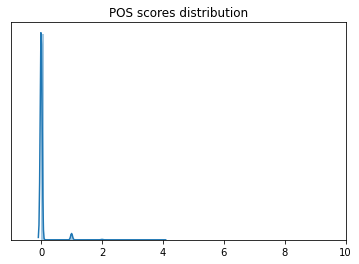

In [162]:
sns.distplot(train_news_merge.total, axlabel=False, ax=plt.gca())
plt.title('POS scores distribution')
plt.gca().get_yaxis().set_visible(False)
plt.xlim(-1,10)
plt.show()

##Wasserstein Distance

Calculating the distance between test article and highly biased article.

And the distance between test article and least biased article.

In [163]:
from scipy.stats import wasserstein_distance
for index, row in train_news_merge.iterrows():
  dist_from_bias = wasserstein_distance([2, 0, 2, -0.75], [row['total_Noun'], row['total_Verb'], row['total_Adj'], row['sentiment_score']])
  dist_from_unbias = wasserstein_distance([0, 0, 0, 0], [row['total_Noun'], row['total_Verb'], row['total_Adj'], row['sentiment_score']])
  bias = 0
  if (dist_from_bias < dist_from_unbias):
    bias = 1
  #train_news_merge.iloc[index, ]['bias'] = bias
  train_news_merge.at[index, 'bias'] = bias

In [164]:
train_news_merge[train_news_merge['bias'] > 0].shape

(16, 23)

As we can see with this approach we are getting only 16 articles those are biased even though there are many articles having biased vocab.

##Data Normalisation

Finding the number of words in an article and dividing total intersecting words with that count. 

In [165]:
train_news_merge['word_count'] = train_news_merge['clean'].str.split().str.len()

In [166]:
train_news_merge['total_Adj'] = train_news_merge['total_Adj'] / train_news_merge['word_count']
train_news_merge['total_Noun'] = train_news_merge['total_Noun'] / train_news_merge['word_count']
train_news_merge['total_Verb'] = train_news_merge['total_Verb'] / train_news_merge['word_count']

In [167]:
train_news_merge['norm_total'] = train_news_merge['total_Adj'] + train_news_merge['total_Noun'] + train_news_merge['total_Verb']

In [189]:
train_news_merge.sort_values(by=['total'], ascending=False)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score,total_Noun,total_Verb,total_Adj,total,bias,word_count,norm_total,new_bias
5458,6137.json,true,Rhode Island has the worst maintained bridges ...,"state-budget,state-finances,transportation",michael-chippendale,State Representative,Rhode Island,republican,1.0,1.0,0.0,1.0,0.0,speech on the RI House floor,rode island worst maintained bridge united sta...,"[0.373, 0.5, 0.127, -0.7506]",0,-0.7506,0.142857,0.000000,0.142857,4.0,1.0,14,0.285714,1.0
8513,4369.json,true,"A national study of 2,500 charter schools show...",education,james-parisi,Lobbyst for the Rhode Island Federation of Tea...,Rhode Island,labor-leader,0.0,0.0,0.0,0.0,0.0,a TV news show,national study charter school show maybe perce...,"[0.149, 0.625, 0.226, 0.1531]",0,0.1531,0.000000,0.000000,0.187500,3.0,0.0,16,0.187500,0.0
1131,3540.json,true,"Virginia was named best managed state, best st...","children,economy,education,elections,small-bus...",tim-kaine,U.S. Senator,Virginia,democrat,8.0,3.0,15.0,15.0,0.0,a YouTube video,virginia named best managed state best state b...,"[0.0, 0.442, 0.558, 0.9274]",1,0.9274,0.000000,0.000000,0.230769,3.0,1.0,13,0.230769,0.0
8118,7870.json,half-true,Our ranking in terms of the best and worst sta...,"job-accomplishments,jobs,small-business",scott-walker,Milwaukee County Executive,Wisconsin,republican,26.0,41.0,32.0,40.0,11.0,a television interview,ranking term best worst state business four ye...,"[0.212, 0.57, 0.218, 0.0258]",0,0.0258,0.000000,0.076923,0.076923,2.0,0.0,13,0.153846,0.0
1539,7756.json,mostly-true,"Four balanced budgets in a row, with no new ta...","job-accomplishments,jobs,state-budget,state-fi...",chris-christie,Governor of New Jersey,New Jersey,republican,10.0,17.0,27.0,19.0,8.0,a television ad,four balanced budget row new tax anyone best j...,"[0.036, 0.514, 0.45, 0.9524]",0,0.9524,0.000000,0.000000,0.076923,2.0,1.0,26,0.076923,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3483,3492.json,pants-fire,One. Thats the number of new drilling permits ...,"energy,oil-spill",michele-bachmann,Congresswoman,Minnesota,republican,8.0,22.0,6.0,4.0,16.0,a speech at the Conservative Principles PAC Co...,one thats number new drilling permit obama adm...,"[0.0, 0.885, 0.115, 0.0772]",0,0.0772,0.000000,0.000000,0.000000,0.0,0.0,11,0.000000,0.0
3484,7294.json,pants-fire,We just had someone last week in Neenah near a...,guns,scott-walker,Milwaukee County Executive,Wisconsin,republican,26.0,41.0,32.0,40.0,11.0,a news conference,someone last week veena near school kill someo...,"[0.343, 0.657, 0.0, -0.6908]",0,-0.6908,0.000000,0.000000,0.000000,0.0,0.0,10,0.000000,1.0
3485,1080.json,false,The Obama administration offered $900 million ...,"foreign-policy,terrorism",republican-national-committee-republican,NaN,NaN,republican,6.0,6.0,11.0,5.0,2.0,a GOP survey,obama administration offered million hamas rec...,"[0.343, 0.657, 0.0, -0.6908]",0,-0.6908,0.000000,0.000000,0.000000,0.0,0.0,10,0.000000,1.0
3486,4897.json,false,Says Wisconsin Gov. Scott Walker is making vot...,"elections,poverty",chris-bowers,NaN,NaN,none,0.0,1.0,0.0,0.0,0.0,an interview,say wisconsin gov scott walker making voting d...,"[0.235, 0.765, 0.0, -0.5574]",0,-0.5574,0.000000,0.000000,0.000000,0.0,0.0,17,0.000000,1.0


In [190]:
train_news_merge[train_news_merge['norm_total']==0]

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score,total_Noun,total_Verb,total_Adj,total,bias,word_count,norm_total,new_bias
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,say nannies list political group support third...,"[0.123, 0.656, 0.221, 0.296]",0,0.2960,0.0,0.0,0.0,0.0,0.0,10,0.0,0.0
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,decline coal start started natural gas took st...,"[0.0, 0.828, 0.172, 0.3612]",0,0.3612,0.0,0.0,0.0,0.0,0.0,14,0.0,0.0
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,hillary clinton agrees john mccain voting give...,"[0.153, 0.552, 0.294, 0.3182]",0,0.3182,0.0,0.0,0.0,0.0,0.0,12,0.0,0.0
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,health care reform legislation likely mandate ...,"[0.0, 0.552, 0.448, 0.7579]",0,0.7579,0.0,0.0,0.0,0.0,0.0,10,0.0,0.0
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,economic turnaround started end term,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,0.0,0.0,0.0,0.0,0.0,5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10271,5473.json,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,NaN,Florida,none,0.0,1.0,1.0,1.0,0.0,"interview on ""The Colbert Report""",larger number shark attack florida case voter ...,"[0.523, 0.379, 0.098, -0.765]",-1,-0.7650,0.0,0.0,0.0,0.0,0.0,8,0.0,1.0
10272,3408.json,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,NaN,Georgia,republican,0.0,0.0,0.0,1.0,0.0,an interview,democrat become party atlanta metro area black,"[0.0, 0.69, 0.31, 0.4019]",0,0.4019,0.0,0.0,0.0,0.0,0.0,7,0.0,0.0
10273,3959.json,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,NaN,Georgia,republican,4.0,11.0,5.0,3.0,3.0,a Republican presidential debate,say alternative social security operates galve...,"[0.0, 0.745, 0.255, 0.5859]",0,0.5859,0.0,0.0,0.0,0.0,0.0,16,0.0,0.0
10274,2253.json,false,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,NaN,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a televised debate on Miami's WPLG-10 against ...,lifting u cuban embargo allowing travel cuba,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,0.0,0.0,0.0,0.0,0.0,7,0.0,0.0


In [191]:
from scipy.stats import wasserstein_distance
for index, row in train_news_merge.iterrows():
  dist_from_bias = wasserstein_distance([0.142857, 0, 0.010204, -0.7506], [row['total_Noun'], row['total_Verb'], row['total_Adj'], row['sentiment_score']])
  dist_from_unbias = wasserstein_distance([0, 0, 0, 0], [row['total_Noun'], row['total_Verb'], row['total_Adj'], row['sentiment_score']])
  bias = 0
  if (dist_from_bias < dist_from_unbias):
    bias = 1
  #train_news_merge.iloc[index, ]['bias'] = bias
  train_news_merge.at[index, 'new_bias'] = bias

In [192]:
train_news_merge[train_news_merge['new_bias'] > 0].shape

(1641, 26)

In [172]:
train_news_merge.sort_values(by=['norm_total'], ascending=False)

,jsonid,label,headline_text,subject,speaker,speakerjobtitle,stateinfo,partyaffiliation,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,context,clean,sentiment_vector,vader_polarity,sentiment_score,total_Noun,total_Verb,total_Adj,total,bias,word_count,norm_total,new_bias
2994,3307.json,half-true,A miscarriage is considered an abortion.,abortion,eddie-lucio-jr,Advertising executive,Texas,democrat,0.0,0.0,1.0,1.0,0.0,remarks on the Senate floor,miscarriage considered abortion,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,0.000000,0.333333,0.000000,1.0,0.0,3,0.333333,0.0
3350,1663.json,pants-fire,I never considered myself a maverick.,candidates-biography,john-mccain,U.S. senator,Arizona,republican,31.0,39.0,31.0,37.0,8.0,a comment on Newsweek magazine's Web site,never considered maverick,"[0.0, 1.0, 0.0, 0.0]",0,0.0000,0.000000,0.333333,0.000000,1.0,0.0,3,0.333333,0.0
7858,10100.json,barely-true,This (Ebola) is not as bad as SARSwas in 2003.,"ebola,health-care,public-health",tavis-smiley,television and radio host,California,none,1.0,0.0,1.0,0.0,0.0,"comments on ABC's ""This Week""",ebola bad salsas,"[0.636, 0.364, 0.0, -0.5423]",-1,-0.5423,0.000000,0.000000,0.333333,1.0,0.0,3,0.333333,1.0
5458,6137.json,true,Rhode Island has the worst maintained bridges ...,"state-budget,state-finances,transportation",michael-chippendale,State Representative,Rhode Island,republican,1.0,1.0,0.0,1.0,0.0,speech on the RI House floor,rode island worst maintained bridge united sta...,"[0.373, 0.5, 0.127, -0.7506]",0,-0.7506,0.142857,0.000000,0.142857,4.0,1.0,14,0.285714,1.0
1697,4852.json,true,We have had some significant accomplishments o...,"bipartisanship,states",john-kasich,"Governor of Ohio as of Jan. 10, 2011",Ohio,republican,9.0,8.0,10.0,18.0,3.0,a news conference,significant accomplishment bipartisan basis,"[0.0, 0.625, 0.375, 0.2023]",0,0.2023,0.000000,0.000000,0.250000,1.0,0.0,4,0.250000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3483,3492.json,pants-fire,One. Thats the number of new drilling permits ...,"energy,oil-spill",michele-bachmann,Congresswoman,Minnesota,republican,8.0,22.0,6.0,4.0,16.0,a speech at the Conservative Principles PAC Co...,one thats number new drilling permit obama adm...,"[0.0, 0.885, 0.115, 0.0772]",0,0.0772,0.000000,0.000000,0.000000,0.0,0.0,11,0.000000,0.0
3484,7294.json,pants-fire,We just had someone last week in Neenah near a...,guns,scott-walker,Milwaukee County Executive,Wisconsin,republican,26.0,41.0,32.0,40.0,11.0,a news conference,someone last week veena near school kill someo...,"[0.343, 0.657, 0.0, -0.6908]",0,-0.6908,0.000000,0.000000,0.000000,0.0,0.0,10,0.000000,1.0
3485,1080.json,false,The Obama administration offered $900 million ...,"foreign-policy,terrorism",republican-national-committee-republican,NaN,NaN,republican,6.0,6.0,11.0,5.0,2.0,a GOP survey,obama administration offered million hamas rec...,"[0.343, 0.657, 0.0, -0.6908]",0,-0.6908,0.000000,0.000000,0.000000,0.0,0.0,10,0.000000,1.0
3486,4897.json,false,Says Wisconsin Gov. Scott Walker is making vot...,"elections,poverty",chris-bowers,NaN,NaN,none,0.0,1.0,0.0,0.0,0.0,an interview,say wisconsin gov scott walker making voting d...,"[0.235, 0.765, 0.0, -0.5574]",0,-0.5574,0.000000,0.000000,0.000000,0.0,0.0,17,0.000000,1.0


#Classification

##Naive Bayes

In [173]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble


train_x, valid_x, train_y, valid_y = model_selection.train_test_split(train_news_merge['clean'], train_news_merge['new_bias'])

tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=500)
tfidf_vect.fit(train_news_merge["clean"])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

In [174]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    print(metrics.confusion_matrix(predictions, valid_y))
    return metrics.accuracy_score(predictions, valid_y), metrics.f1_score(predictions, valid_y)

In [175]:
accuracy, f1 = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print("NB, WordLevel TF-IDF: ", accuracy, f1)

[[2164  306]
 [  12   87]]
NB, WordLevel TF-IDF:  0.876216426625146 0.3536585365853659


##SVM

In [176]:
accuracy, f1 = train_model(svm.SVC(), xtrain_tfidf, train_y, xvalid_tfidf)
print("SVM, WordLevel TF-IDF: ", accuracy, f1)

[[2144  236]
 [  32  157]]
SVM, WordLevel TF-IDF:  0.8956792526274815 0.5395189003436427
